# Lista 5
Maria Nowacka

In [1]:
# interpolacja z wykładu
def lagrange(x,xData,yData):
    n = len(xData)
    y = 0
    for i in range(n):
        w = 1.0
        for j in range(n):
            if i != j:
                w = w*(x-xData[j])/(xData[i]-xData[j])
        y = y + w*yData[i]
    return y


In [2]:
import matplotlib.pyplot as plt, numpy as np

## zadanie 1
Gęstość powietrza $ρ$ zmienia się z wysokością $h$ w następujący sposób:

$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l}
   \hline \hline
   h (\text{km})& 0 & 3 & 6 \\ \hline
\rho (\text{kg/m}^3) &  1,225 & 0,905 & 0,652 \\ \hline \hline
\end{array}
$$
Wyraź $ρ(h)$ jako funkcję kwadratową w $h$.

array([ 1.225     , -0.11783333,  0.00372222])

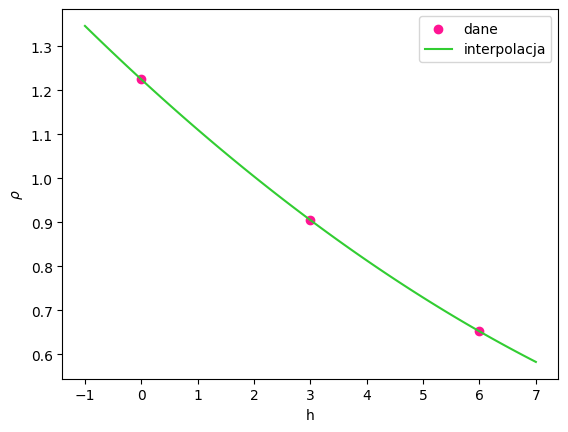

In [43]:
points = [[0, 1.225], [3, 0.905], [6, 0.652]]
def poly(x, coeffs):
    result = 0
    ln = len(coeffs)
    for i, coeff in enumerate(coeffs):
        pow = ln - 1 - i
        result += coeff * x**pow
    return result
def interpolation(points, example = 1):
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    n = len(x)-1
    W = np.copy(y)
    # obliczanie ilorazów różnicowych
    for i in range(1,n+1):
        for j in range(n,i-1,-1):
            W[j]=(W[j]-W[j-1])/(x[j]-x[j-i])
    a = np.copy(W)
    # zmiana ilorazów różnicowych na współczynniki wielomianu
    for i in range(n):
        for j in range(n-1,i-1,-1):
            a[j]=a[j]-x[j-i]*a[j+1]
    if example == 1:
        xs = np.linspace(min(x)-1, max(x)+1, 100)
        # obliczanie wartości wielomianu na wybranym przedziale
        ys = [poly(s, a[::-1]) for s in xs]
        # przedstawienie na wykresie
        plt.scatter(x,y, color = 'deeppink', label = "dane")
        plt.plot(xs, ys, color = 'limegreen', label = 'interpolacja')
        plt.xlabel('h')
        plt.ylabel(r'$\rho$')
        plt.legend()
        return a
    if example == 3:
        return [poly(s, a[::-1]) for s in [5, 50 , 5000]]
interpolation(points)

In [22]:
def wielomian(x):
    return 1.225 - 0.11783333*x + 0.00372222*x**2

Uzyskujemy wielomian postaci:
$$ p(x) = 1.225 - 0.11783333x + 0.00372222x^2 $$

Teraz obliczymy to samo zadanie za pomocą funkcji wbudowanych.

Współczynniki wielomianu: [ 0.00372222 -0.11783333  1.225     ]


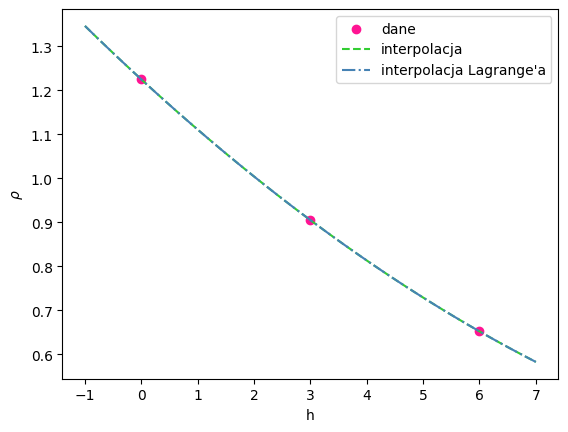

In [21]:
from scipy.interpolate import lagrange
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
coefficients = np.polyfit(x, y, deg=len(x) - 1)
poly_lagrange = lagrange(x, y)
polynomial = np.poly1d(coefficients)
xs = np.linspace(min(x)-1, max(x)+1, 100)
ys = polynomial(xs)
ysl = poly_lagrange(xs)
plt.scatter(x,y, color = 'deeppink', label = "dane")
plt.plot(xs, ys, color = 'limegreen', label = 'interpolacja', linestyle = '--')
plt.plot(xs, ysl, color = 'steelblue', label = "interpolacja Lagrange'a", linestyle = "-.")
plt.xlabel('h')
plt.ylabel(r'$\rho$')
plt.legend()

print("Współczynniki wielomianu:", coefficients)

Jak widać otrzymujemy takie same współczynniki wielomianu oraz identyczne wykresy dle wbudowanych oraz metod oraz implementacji.

## zadanie 2
W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w
cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji sklejanych, znajdź $c_D$ dla $Re$ = 5, 50, i 5000.
$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l|l|l|l}
   \hline \hline
   Re & 0,2 & 2 & 20 & 200 & 2000 & 20000\\ \hline
   c_D &  103 & 13,9 & 2,72 & 0,8 & 0,401 & 0,433 \\ \hline \hline
\end{array}
$$

Możemy przedstawić podane punkty na wukresie.

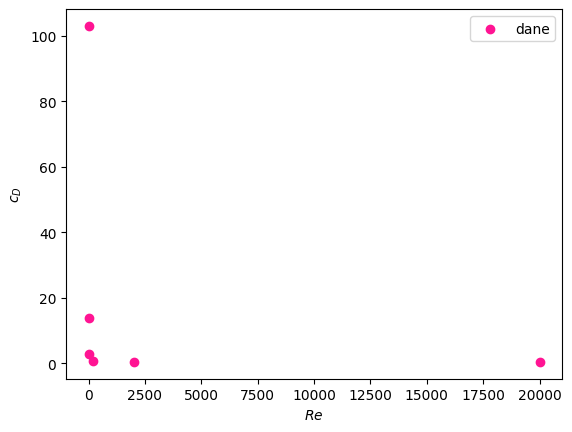

In [48]:
recd = np.array([[0.2, 103], [2, 13.9], [20, 2.72], 
                 [200, 0.8], [2000, 0.401], [2*10**4, 0.433]])
x, y = [r[0] for r in recd], [r[1] for r in recd]
plt.scatter(x, y, color = 'deeppink', label = "dane")
plt.xlabel(r'$Re$')
plt.ylabel(r'$c_D$')
plt.legend()

In [49]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x,y, bc_type='natural')
re_points = [5, 50, 5000]
spline_vals = cs(re_points)
print(f'Re = {re_points}\ncD = {spline_vals}')
# plt.scatter(x, y, color = 'deeppink', label = "dane")
# plt.scatter(re_points, spline_vals, color = 'limegreen', label = 'finkcje sklejane')
# plt.xlabel(r'$Re$')
# plt.ylabel(r'$c_D$')
# plt.legend()

Re = [5, 50, 5000]
cD = [ -88.94021032  458.28842121 9920.95571242]


Obliczone przez wbudowane funkcje wartości możemy przedstawić w tabeli:
$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l}
   \hline \hline
   Re & 5 & 50 & 5000\\ \hline
   c_D &  -88.94021032 & 458.28842121 & 9920.95571242 \\ \hline \hline
\end{array}
$$

## zadanie 3
Rozwiąż zad. 2 przy pomocy interpolacji wielomianowej.

In [51]:
cd_values = interpolation(recd, 3)
print(f'Re = {re_points}\ncD = {cd_values}')

Re = [5, 50, 5000]
cD = [-96.10046207185478, 2581.144117967352, 1658455172.0854995]


Obliczone przez interpolację wielomianową wartości możemy przedstawić w tabeli:
$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l}
   \hline \hline
   Re & 5 & 50 & 5000\\ \hline
   c_D &  -96.10046207185478 & 2581.144117967352 & 1658455172.0854995 \\ \hline \hline
\end{array}
$$
Jak widać, wyniki różnią się od tych uzyskanych poprzednią metodą. Wynika to z różnic w sposobie dopasowania funkcji do punktów.

## zadanie 4
Wyznacz parametry a i b tak, aby funkcja $f(x) = ae^{bx}$ aproksymowała
poniższe dane w sensie najmniejszych kwadratów.
$$
\def\arraystretch{1}
   \begin{array}{l|llllll}
   \hline \hline
   x & 1,2 & 2,8 & 4,3 & 5,4 & 6,8 & 7,9\\ \hline
   y & 7,5 & 16,1 & 38,9 & 67,0 & 146,6 & 266,2 \\ \hline \hline
\end{array}
$$
Policz odchylenie standardowe. Wyniki przedstaw na wykresie.

a = 3.613733933422907, b = 0.5442486608957392
y = 3.614 * exp(0.544 * x)
Odchylenie standardowe = 0.8313228535882667


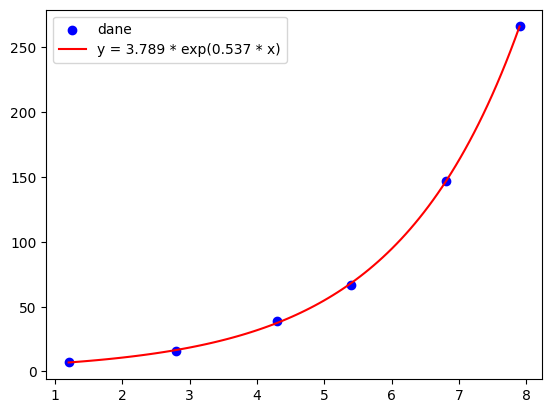

In [102]:
from scipy.optimize import curve_fit

def model(x, a, b):
    return a*np.exp(b*x)

def approx(x, y):
    popt, _ = curve_fit(model, x, y)
    a1, b1 = popt
    residuals1 = np.array([y[i] - a1 * np.exp(b1 * x[i]) for i in range(6)])
    std1 = np.std((residuals1))
    X_fit = np.linspace(min(x), max(x), 100)
    Y_fit = model(X_fit, *popt)
    plt.scatter(x, y, label = 'dane', color='blue')
    plt.plot(X_fit, Y_fit, label=f'y = {a:.3f} * exp({b:.3f} * x)', color='red')
    plt.legend()
    print(f'a = {a1}, b = {b1}')
    print(f'y = {a1:.3f} * exp({b1:.3f} * x)')
    print(f'Odchylenie standardowe = {std1}')
x = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
y = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])
approx(x, y)

a = 3.7888579604822197, b = 0.5365836969710379
y = 3.789 * exp(0.537 * x)
Odchylenie standardowe = 1.6397439579598034


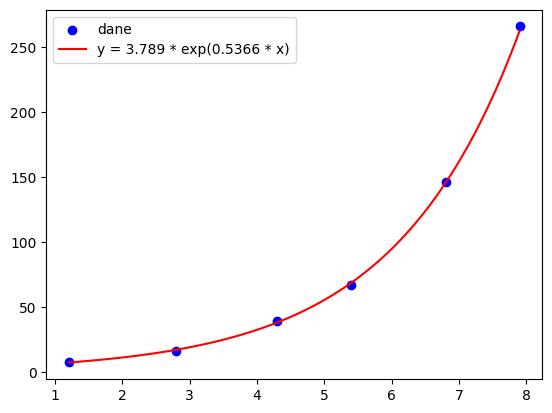

In [103]:
def exp_approx(x, y):
    # nakładając logarytm uzyskamy 
    # log(y) = log(a) + bx
    coeff = np.polyfit(x, np.log(y), 1)
    a, b = np.exp(coeff[1]), coeff[0]
    return a, b

a2, b2 = exp_approx(x, y)
fun = lambda x: a2 * np.exp(b2 * x) 
residuals4 = y - fun(x)
std2 = np.std(residuals4)
print(f'a = {a2}, b = {b2}')
print(f'y = {a2:.3f} * exp({b2:.3f} * x)')
print(f'Odchylenie standardowe = {std2}')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fun(x_fit)
plt.scatter(x, y, label = 'dane', color='blue')
plt.plot(x_fit, y_fit, label=f'y = {a2:.3f} * exp({b2:.4f} * x)', color='red')
plt.legend()

Zadanie zostało wykonane na 2 sposoby:

1. Używając `curve_fit` i modelu eksponencjalnego. Uzyskane wyniki to: \
a = 3.613733933422907, b = 0.5442486608957392 \
y = 3.614 * exp(0.544 * x) \
Odchylenie standardowe = 0.8313228535882667

2. Nakładając logarytm i wykorzystując `polyfit`, co dało nam nastęujące wyniki: \
a = 3.7888579604822197, b = 0.5365836969710379 \
y = 3.789 * exp(0.537 * x) \
Odchylenie standardowe = 1.6397439579598034

Wyniki są mocno zbliżone do siebie, jednka możemy zauważyć, że odchylenie standardowe modelu od danych jest mniejsze w 1. przypadku. Możemy więc wnioskować, że dopasowanie funkcji wykładnicze daje lepsze rezultaty od dopasowywania jej przekształceń (nałożenie logarytmu).

## zadanie 5
Kinematyczna lepkość wody $µ_k$ zmienia się z temperaturą $T$ według poniższej tabeli. Wyznacz wielomian trzeciego stopnia, który najlepiej aproksymuje te dane i skorzystaj z niego do obliczenia $µ_k$ dla $T = 10\degree ,\ 30\degree,\ 60\degree \text{ i} \ 90\degree$.
$$
\def\arraystretch{1}
   \begin{array}{l|lllllll}
   \hline \hline
   T (\degree C) & 0 & 21,1 & 37,8 & 54,4 & 71,1 & 87,8 & 100\\ \hline
   \mu_k (10^{-3}m^2/s) & 1,79 & 1,13 & 0,696 & 0,519 & 0,338 & 0,321 & 0,296 \\ \hline \hline
\end{array}
$$

In [ ]:
T = [0, 21.1, 37.8, 54.4, 71.1, 87.8, 100]
mu_k = [1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296]